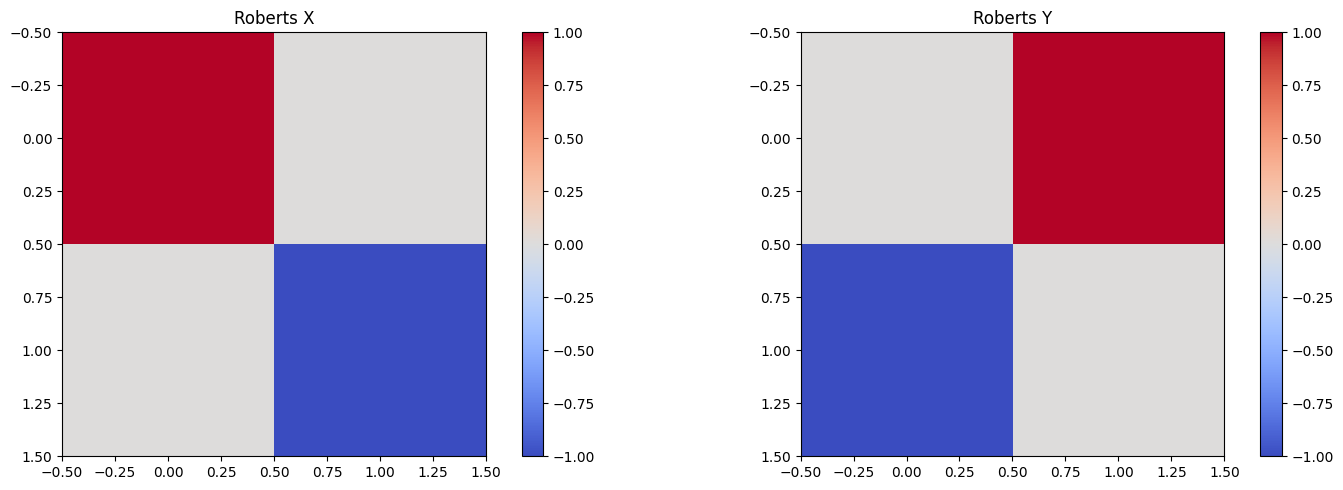

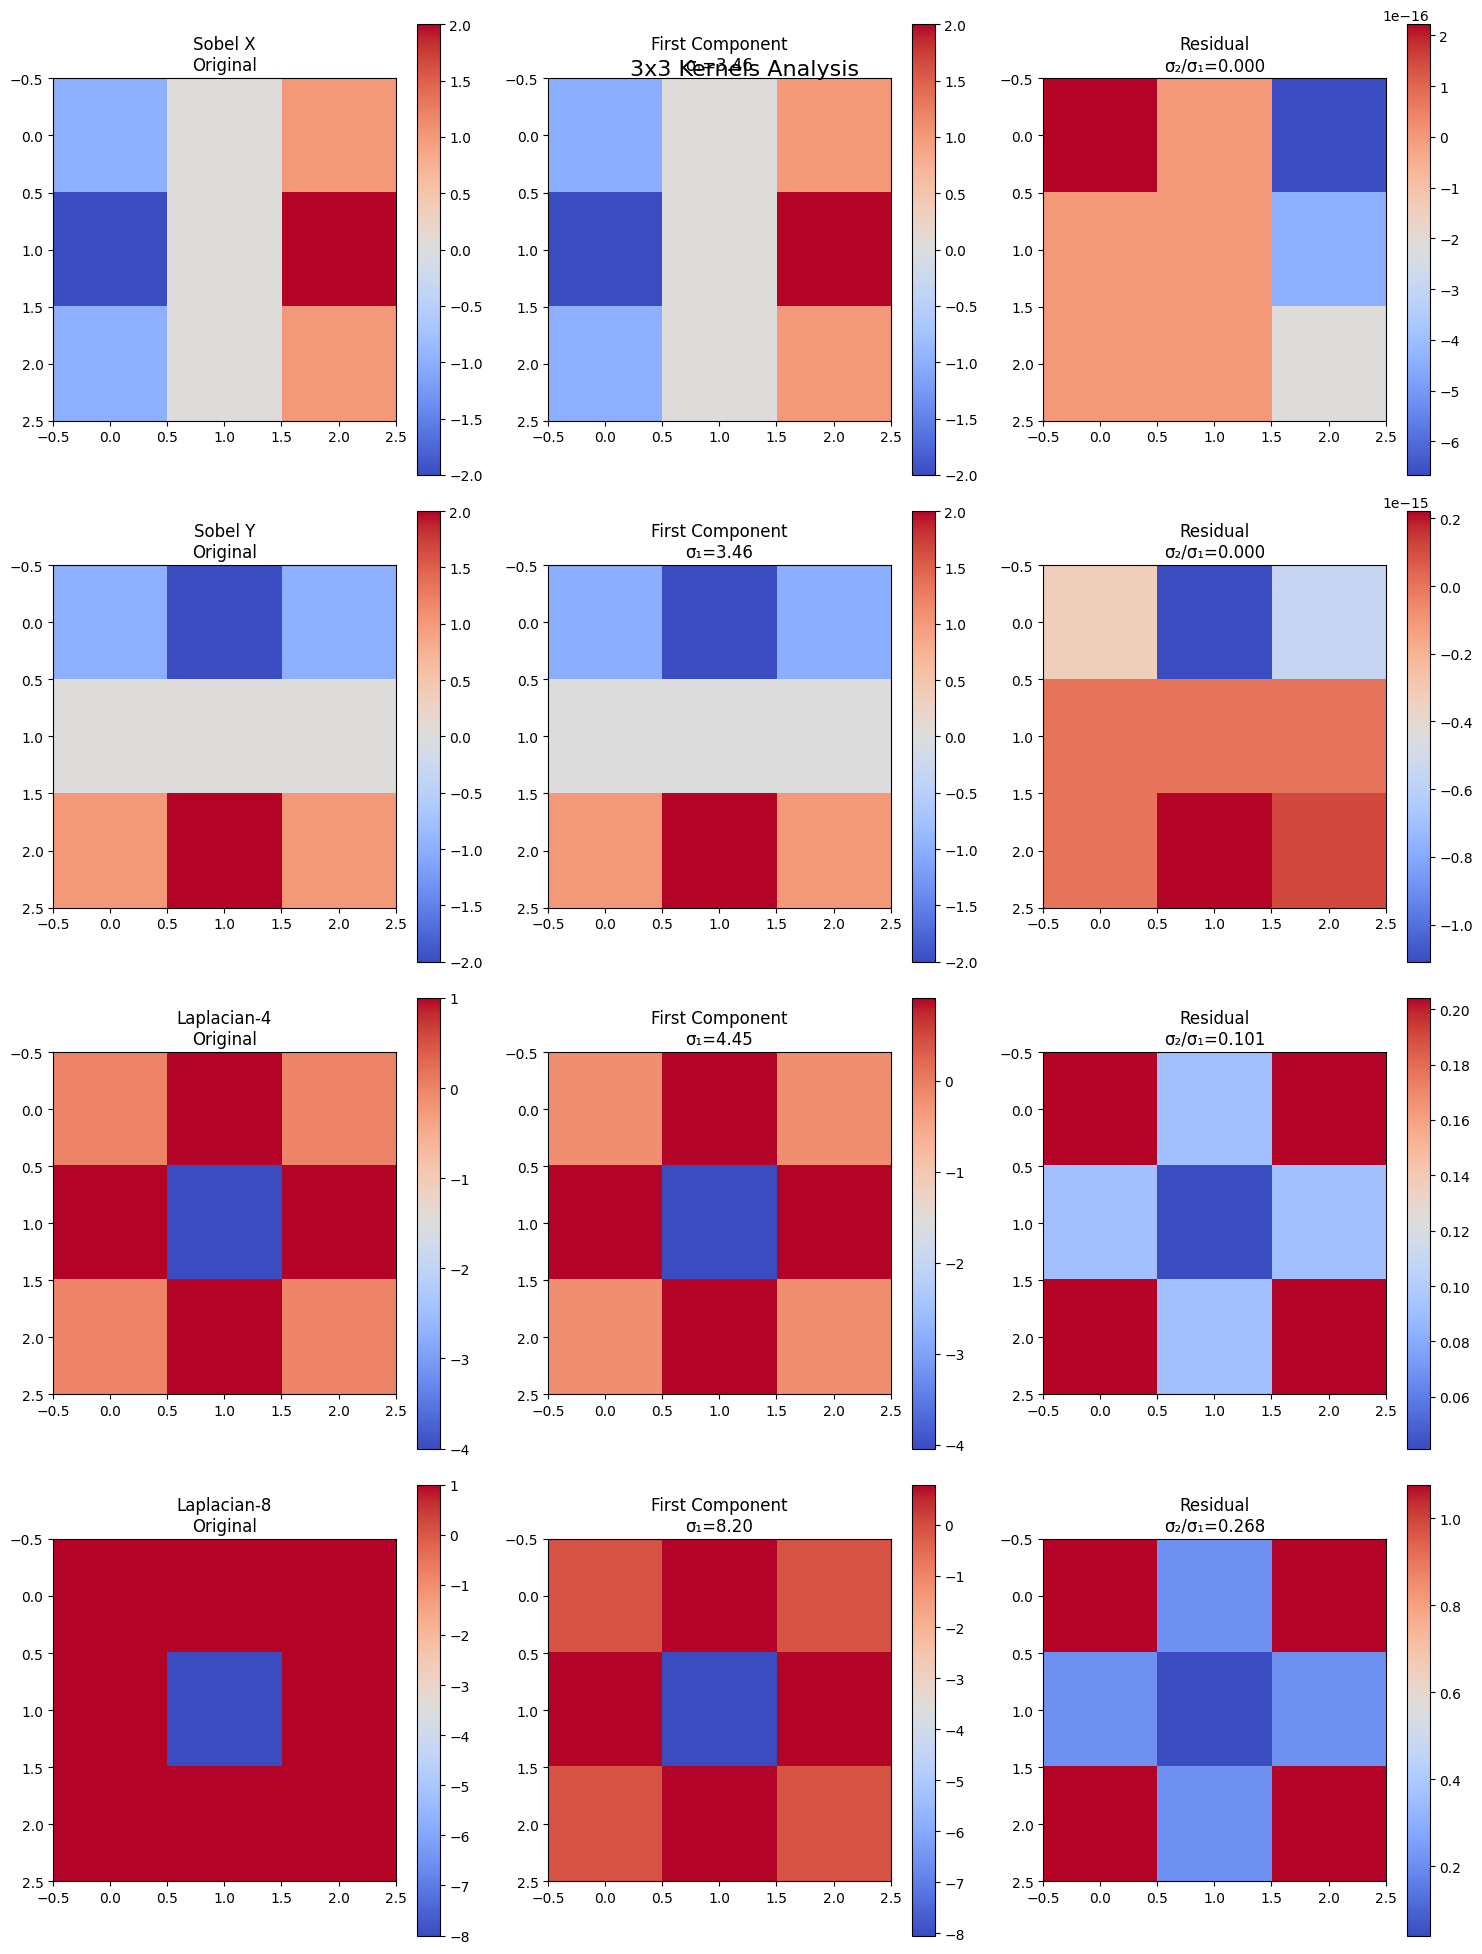

Detailed Analysis of Edge Detection Operators:


Roberts X:
Kernel:
[[ 1  0]
 [ 0 -1]]

Rank: 2
Singular values: [1. 1.]
Kernel is NOT separable
Ratio of second to first singular value: 1.000

Kernel properties:
Sum of elements: 0
Max value: 1
Min value: -1
--------------------------------------------------

Roberts Y:
Kernel:
[[ 0  1]
 [-1  0]]

Rank: 2
Singular values: [1. 1.]
Kernel is NOT separable
Ratio of second to first singular value: 1.000

Kernel properties:
Sum of elements: 0
Max value: 1
Min value: -1
--------------------------------------------------

Sobel X:
Kernel:
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]

Rank: 1
Singular values: [3.46410162e+00 3.51083347e-16 0.00000000e+00]
Kernel IS separable
Can be decomposed as outer product of:
Vertical vector: [-0.40824829 -0.81649658 -0.40824829]
Horizontal vector: [ 0.70710678  0.         -0.70710678]

Kernel properties:
Sum of elements: 0
Max value: 2
Min value: -2
--------------------------------------------------

Sobel Y:
Kern

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define all kernels
roberts_x = np.array([[1, 0],
                     [0, -1]])

roberts_y = np.array([[0, 1],
                     [-1, 0]])

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

lap_4 = np.array([[0, 1, 0],
                  [1, -4, 1],
                  [0, 1, 0]])

lap_8 = np.array([[1, 1, 1],
                  [1, -8, 1],
                  [1, 1, 1]])

def check_separability(kernel):
    """
    Check if kernel is separable using SVD
    """
    U, S, Vt = np.linalg.svd(kernel)
    significant_values = S[S > 1e-10]
    rank = len(significant_values)

    if rank == 1:
        kernel_reconstructed = S[0] * U[:, 0:1] @ Vt[0:1, :]
        error = np.max(np.abs(kernel - kernel_reconstructed))
        return True, rank, error, U[:, 0], Vt[0, :]
    else:
        return False, rank, None, None, None

# Create two separate figures
plt.figure(figsize=(15, 5))
# Plot 2x2 Roberts kernels
plt.subplot(121)
plt.imshow(roberts_x, cmap='coolwarm')
plt.title('Roberts X')
plt.colorbar()

plt.subplot(122)
plt.imshow(roberts_y, cmap='coolwarm')
plt.title('Roberts Y')
plt.colorbar()

plt.tight_layout()
plt.show()

# Plot 3x3 kernels with their SVD analysis
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
plt.suptitle('3x3 Kernels Analysis', fontsize=16, y=0.95)

kernels_3x3 = {
    'Sobel X': sobel_x,
    'Sobel Y': sobel_y,
    'Laplacian-4': lap_4,
    'Laplacian-8': lap_8
}

for idx, (name, kernel) in enumerate(kernels_3x3.items()):
    # Original kernel
    axes[idx, 0].imshow(kernel, cmap='coolwarm')
    axes[idx, 0].set_title(f'{name}\nOriginal')
    plt.colorbar(axes[idx, 0].imshow(kernel, cmap='coolwarm'), ax=axes[idx, 0])

    # SVD analysis
    U, S, Vt = np.linalg.svd(kernel)
    first_component = S[0] * np.outer(U[:, 0], Vt[0, :])

    # First component
    axes[idx, 1].imshow(first_component, cmap='coolwarm')
    axes[idx, 1].set_title(f'First Component\nσ₁={S[0]:.2f}')
    plt.colorbar(axes[idx, 1].imshow(first_component, cmap='coolwarm'), ax=axes[idx, 1])

    # Residual
    residual = kernel - first_component
    axes[idx, 2].imshow(residual, cmap='coolwarm')
    axes[idx, 2].set_title(f'Residual\nσ₂/σ₁={S[1]/S[0]:.3f}')
    plt.colorbar(axes[idx, 2].imshow(residual, cmap='coolwarm'), ax=axes[idx, 2])

plt.tight_layout()
plt.show()

# Print detailed analysis
print("Detailed Analysis of Edge Detection Operators:\n")

all_kernels = {
    'Roberts X': roberts_x,
    'Roberts Y': roberts_y,
    'Sobel X': sobel_x,
    'Sobel Y': sobel_y,
    'Laplacian-4': lap_4,
    'Laplacian-8': lap_8
}

for name, kernel in all_kernels.items():
    print(f"\n{name}:")
    print("Kernel:")
    print(kernel)

    # Check separability
    is_sep, rank, error, v, h = check_separability(kernel)
    print(f"\nRank: {rank}")

    # Get singular values
    U, S, Vt = np.linalg.svd(kernel)
    print("Singular values:", S)

    if is_sep:
        print("Kernel IS separable")
        print(f"Can be decomposed as outer product of:")
        print(f"Vertical vector: {v}")
        print(f"Horizontal vector: {h}")
    else:
        print("Kernel is NOT separable")
        if len(S) > 1:
            print(f"Ratio of second to first singular value: {S[1]/S[0]:.3f}")

    print("\nKernel properties:")
    print(f"Sum of elements: {np.sum(kernel)}")
    print(f"Max value: {np.max(kernel)}")
    print(f"Min value: {np.min(kernel)}")
    print("-" * 50)